#  *Food App RATING PREDICTION*


## Overall Approach

    1)  Exploratory Data Analysis
    2)  Data Cleaning
    3)  Dimension Reduction
    4)  Missing Values Imputation    
    5)  Data Visualization
    6)  Outlier detection & Handling
    7)  Binarization
    8)  Discretization
    9)  Correlation
    10) Feature Subset Selection(Filter Methods)
    11) Stratified Sampling
    12) Model Building(OLS & Stochastic Models)
    13) Principal Component Analysis
    

#### Import all needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime
from scipy import stats
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## <CENTER><span style='color: Brown'>Task (A): Data Quality and Transformation </span>

### EDA TASKS PERFORMED:
    1. READ THE EXCEL FILE INTO A DATAFRAME  
    2. CHECK FOR DUPLICATE ROWS AND DROP FIRST
    3. CHECK AND REPLACE NULL VALUES  
    4. DIMENSION REDUCTION - DROP UNNECESSARY COLUMNS
    5. CHANGE TO APPROPRIATE DATATYPES    
    6. DATE AND TIME - FORMATTING
    7. BINARIZATION USING DUMMIES CONCEPT  
    8. DISCRETIZATTION OF PAID AMOUNT (EQUAL WIDTH BINNING) FOR ANALYSIS
    9. FEATURE CREATION - TIME TAKEN, DAY OF WEEK

### EXCEPTIONS IN THE DATA:
    1. THERE IS A RECORD WITH NEGATIVE VALUE IN THE DISCOUNT FIELD 
    2. THERE IS A RECORD WITH DELIVERY TIME LESS THAN ORDER TIME
    3. THERE IS A RECORD WITH NEGATIVE VALUE IN DISTANCE FIELD
    4. THERE IS A RECORD WITH INVALID VALUES IN MOST OF THE FIELDS (DATA-ENTRY ERROR)
    5. 'PROVIDER' FEATURE IS NULL COLUMN - (MISSING COMPLETELY AT RANDOM)
    6. 'PAID AMOUNT' FEATURE IS NULL COLUMN - (MISSING AT RANDOM)
    7. 'PROMO CODE' FEATURE CONTAINS NULL VALUES - (MISSING NOT AT RANDOM)
    8. 'TIME TAKEN' FEATURE CONTAINS ZERO VALUES - REPLACED WITH MEDIAN

#### Read the input excel file into a dataframe

In [2]:
file_path = r"C:\Users\Aspire V3-572\Desktop\AIML Mini Project\Feature Engineering\Food Orders - Shared-1.xlsx"

df = pd.read_excel(file_path,header=0)

#### Check the number of records in the dataset

Confirm import using shape function

In [3]:
df.shape

(60, 21)

There are 60 records and 21 attributes in the dataset.

Let's take a quick look at the columns

In [4]:
df.columns

Index(['ID', 'Provider', 'DateTime', 'Distance', 'Status', 'Cost', 'PromoCode',
       'Delivery Time', 'Discount', 'Paid amount', 'Payment mode',
       'Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Type', 'Rating'],
      dtype='object')

#### Display information about the dataframe using head function

In [5]:
df.head(2)

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,COD,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,WALLET,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0


<span style='background : yellow' > **Observation:**   </span> Looking at the statistical summary of the data, it's observed that there is a negative value in Distance and Discount columns. Paid amount contains only 1 value and we will need to derive this column. Provider column is empty. There are lesser records with Discount & Tip.

In [6]:
df.describe()

,ID,Provider,Distance,Discount,Paid amount,Tip,Rating
count,58.000000,0.0,59.000000,24.000000,1.0,24.000000,57.000000
mean,52.655172,NaN,3.593220,33.750000,5.0,4.875000,2.403509
std,101.657587,NaN,1.340595,18.371173,NaN,0.612372,1.771396
min,1.000000,NaN,-2.000000,-25.000000,5.0,2.000000,0.000000
25%,13.250000,NaN,3.000000,25.000000,5.0,5.000000,1.000000
50%,27.500000,NaN,3.000000,25.000000,5.0,5.000000,3.000000
75%,41.750000,NaN,4.000000,50.000000,5.0,5.000000,4.000000
max,467.000000,NaN,6.000000,50.000000,5.0,5.000000,5.000000


### <span style='color: Purple'>DATA CLEANING </span>

<b>
Checking for duplicate rows
</b>

In [7]:
dv = df.duplicated(keep=False)
dv.sum()

4

<span style='background : yellow' > **Observation:**   </span> There are 4 duplicate records i.e. 2 records repeating hence, let's keep the first occurence and drop the 2nd

In [8]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
len(df)

58

### <span style='color: Purple'>DIMENSION REDUCTION </span>

<span style='background : yellow' > **Observation:**   </span> 
* There are few features in the dataset which do not have any significance like 'Provider' & 'ID' and a column named 'PureVeg' which has same significance as 'Type' hence dropping these.
* Checked null value in 'Status' column, the resultant row is invalid hence Dropped. 

In [9]:
df = df.drop(['Provider'], axis = 1)
df = df.drop(['ID'], axis = 1)
df = df.drop(['PureVeg'], axis = 1)
df.head(2)

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating
0,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,COD,20,NaN,10,5,NaN,PANEER;ROTI,BING,VEG,2.0
1,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,WALLET,20,NaN,10,5,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0


In [10]:
df.drop(df[~df['Status'].isin(['Delivered', 'Cancelled'])].index, inplace = True)

#Reset the index after dropping the invalid row & duplicates
df.reset_index(drop=True, inplace=True)

### <span style='color: Purple'>Missing Values Imputation, Data type Conversion & Feature Construction </span>

<span style='background : yellow' > **Observation and Approach:**   </span> 
* Imputing null values in Discount, Surge charges & Tip columns with zeroes
* Null in Rating column - replacing with mode value
* Null in PromoCode column - replacing with a new category 'NONE' and dropped 'NONE' category during Binarization
* 'Paid amount' is empty - Derived using existing features. Paid amount is considered as '0' for Cancelled orders

In [11]:
df.isnull().sum()

DateTime              0
Distance              0
Status                0
Cost                  0
PromoCode            23
Delivery Time         0
Discount             35
Paid amount          57
Payment mode          0
Delivery charges      0
Surge charges        30
Packaging charges     0
ST                    0
Tip                  34
Items                 0
Membership            0
Type                  0
Rating                2
dtype: int64

In [12]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])
df['Discount'] = df['Discount'].fillna(0)
df['Surge charges'] = df['Surge charges'].fillna(0)
df['Tip'] = df['Tip'].fillna(0)
df['PromoCode'] = df['PromoCode'].fillna('NONE')

#### Changing the datatypes of object type to float for amount fields and Rating to int

In [13]:
df['Rating'] = df['Rating'].astype(int)
df['ST'] = df['ST'].astype(float)
df['Cost'] = df['Cost'].astype(float)
df['Packaging charges'] = df['Packaging charges'].astype(float)
df['Delivery charges'] = df['Delivery charges'].astype(float)
df['Surge charges'] = df['Surge charges'].astype(float)

Derive 'Paid amount'

In [14]:
df['Total'] = (df['Cost']
            - df['Discount']
            + df['Packaging charges']) 

df['Paid amount'] = (df['Total']
                  + df['Delivery charges']
                  + df['Surge charges']
                  + (df['Total']* df['ST']/100)
                  + df['Tip'])
    
df['Paid amount'] = df['Paid amount'].astype(float)
df.drop("Total", axis = 1, inplace=True)
df.head(2)  

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating
0,1-July-2020 8.38 PM,3.0,Delivered,300.0,PRO,1-July-2020 9.38 PM,50.0,293.0,COD,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,2
1,1-July-2020 8.38 AM,3.0,Delivered,100.0,BF,1-July-2020 8.58 AM,0.0,140.5,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4


In [15]:
# Cancelled orders
for i in df.index:
    if df['Status'][i] == 'Cancelled':
        df['Paid amount'][i] = 0.0

<b>
Check the quality of the data and data types of each column using info function
</b>

We do not have any null values in the data now and the datatypes are appropriate

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DateTime           57 non-null     object 
 1   Distance           57 non-null     float64
 2   Status             57 non-null     object 
 3   Cost               57 non-null     float64
 4   PromoCode          57 non-null     object 
 5   Delivery Time      57 non-null     object 
 6   Discount           57 non-null     float64
 7   Paid amount        57 non-null     float64
 8   Payment mode       57 non-null     object 
 9   Delivery charges   57 non-null     float64
 10  Surge charges      57 non-null     float64
 11  Packaging charges  57 non-null     float64
 12  ST                 57 non-null     float64
 13  Tip                57 non-null     float64
 14  Items              57 non-null     object 
 15  Membership         57 non-null     object 
 16  Type               57 non-nu

### <span style='color: Purple'>DATE-TIME FORMATTING & FEATURE CREATION </span>
#### Approach: 
* Split Date columns into Data & Time, convert the individual columns to timestamp format
* Derive 'TimeTaken' column in minutes - difference of Delivery Time & Order Time
* Derive 'DayofWeek' column from date
* Dropped the original date & time columns

In [17]:
df[['OrderDATE', 'OrderTIME']] = df.DateTime.str.split(n = 1, expand = True)
df[['DeliveryDATE', 'DeliveryTIME']] = df['Delivery Time'].str.split(n = 1, expand = True)

df.drop("DateTime", axis = 1, inplace=True)
df.drop("Delivery Time", axis = 1, inplace=True)
df.head(2)

,Distance,Status,Cost,PromoCode,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating,OrderDATE,OrderTIME,DeliveryDATE,DeliveryTIME
0,3.0,Delivered,300.0,PRO,50.0,293.0,COD,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,2,1-July-2020,8.38 PM,1-July-2020,9.38 PM
1,3.0,Delivered,100.0,BF,0.0,140.5,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4,1-July-2020,8.38 AM,1-July-2020,8.58 AM


In [18]:
df['OrderDATE'] = pd.to_datetime(df['OrderDATE'])
df['DeliveryDATE'] = pd.to_datetime(df['DeliveryDATE'])

In [19]:
df['OrderTIME'] =  df['OrderTIME'].apply(lambda x: datetime.strptime(x, '%I.%M %p').strftime('%H:%M:%S'))
df['DeliveryTIME'] =  df['DeliveryTIME'].apply(lambda x: datetime.strptime(x, '%I.%M %p').strftime('%H:%M:%S'))

In [20]:
df['OrderTIME'] = pd.to_datetime(df['OrderTIME'],format= '%H:%M:%S' ).apply(pd.Timestamp)
df['DeliveryTIME'] = pd.to_datetime(df['DeliveryTIME'],format= '%H:%M:%S' ).apply(pd.Timestamp)

In [21]:
Orderyear = df['OrderDATE'].dt.year
Ordermonth = df['OrderDATE'].dt.month
Orderday = df['OrderDATE'].dt.day

Deliveryyear = df['DeliveryDATE'].dt.year
Deliverymonth = df['DeliveryDATE'].dt.month
Deliveryday = df['DeliveryDATE'].dt.day

length = len(df)

for i in range(0,length):
    df['OrderTIME'][i] = df['OrderTIME'][i].replace(year = Orderyear[i],month = Ordermonth[i], day = Orderday[i])
    df['DeliveryTIME'][i] = df['DeliveryTIME'][i].replace(year = Deliveryyear[i],month = Deliverymonth[i], day = Deliveryday[i])
    

In [22]:
df['TimeTaken'] = (df['DeliveryTIME'] - df['OrderTIME']).dt.seconds
df['TimeTaken'] = df['TimeTaken']/60

In [23]:
df['DayofWeek'] = df['OrderDATE'].dt.dayofweek
df = df.drop("DeliveryDATE", axis = 1)
df = df.drop("OrderDATE", axis = 1)

In [24]:
df.head()

,Distance,Status,Cost,PromoCode,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating,OrderTIME,DeliveryTIME,TimeTaken,DayofWeek
0,3.0,Delivered,300.0,PRO,50.0,293.0,COD,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,2,2020-07-01 20:38:00,2020-07-01 21:38:00,60.0,2
1,3.0,Delivered,100.0,BF,0.0,140.5,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4,2020-07-01 08:38:00,2020-07-01 08:58:00,20.0,2
2,6.0,Cancelled,250.0,PRO,25.0,0.0,CARD,25.0,10.0,10.0,5.0,5.0,MIXVEG;RICE,BING,VEG,0,2020-07-01 21:00:00,2020-07-01 21:30:00,30.0,2
3,4.0,Delivered,550.0,PRO,0.0,623.0,COD,25.0,10.0,10.0,5.0,0.0,CHICKEN;BIRYANI,NO,MIX,1,2020-07-01 19:30:00,2020-07-01 21:05:00,95.0,2
4,3.0,Cancelled,125.0,PRO,0.0,0.0,COD,20.0,0.0,10.0,5.0,0.0,DAL;ROTI,NO,VEG,1,2020-07-01 20:38:00,2020-07-01 19:38:00,1380.0,2


### Checking Initial Distributions of features & Outlier Detection

### <span style='color: Purple'> UNIVARIATE ANALYSIS </span>
<span style='background : yellow' > **Observation:**   </span> 
* It is observed that there are 2 -ve values present in Distance feature, replacing it with absolute values of those.
* There is a -ve value in Discount feature, replacing it with absolute values.
* There is an outlier and some zeroes in TimeTaken feature, handling these with IQR method 
* 'Packaging charges' and 'ST' dont seem to have any correlation with any other columns hence dropping these 2 columns

<AxesSubplot:title={'center':'Promotion code'}>

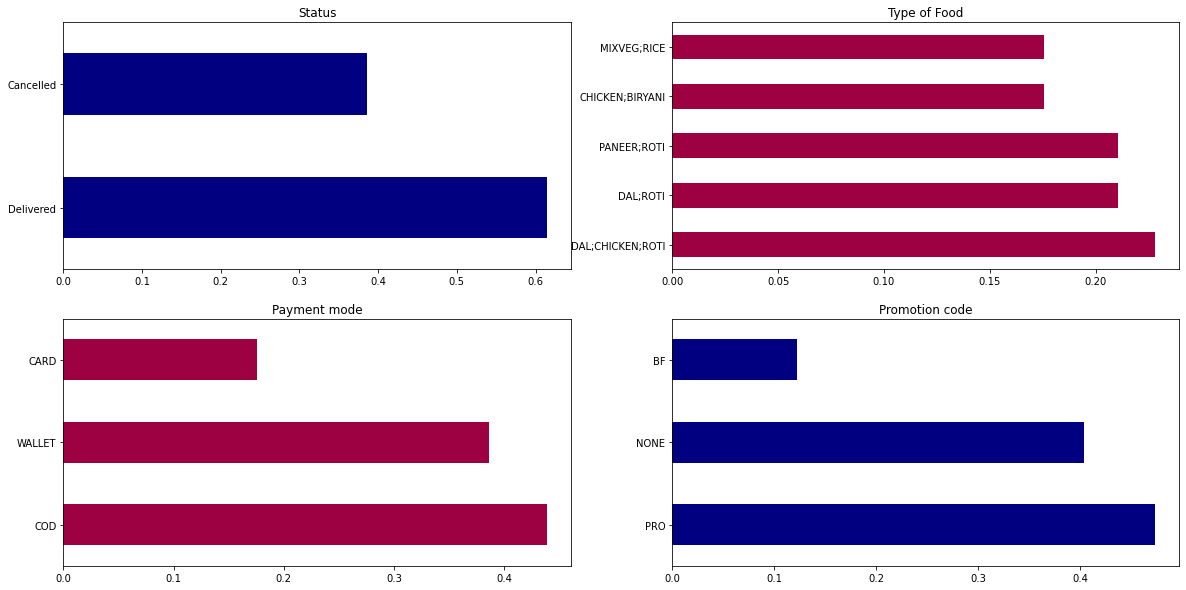

In [25]:
from matplotlib import cm
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')
df['Status'].value_counts().plot.barh(cmap=cmap)

plt.figure(1)

plt.subplot(221) 
df['Status'].value_counts(normalize=True).plot.barh(figsize=(20,10), cmap=cmap, title= 'Status') 

plt.subplot(222) 
df['Items'].value_counts(normalize=True).plot.barh(title= 'Type of Food', cmap=cmap1) 

plt.subplot(223) 
df['Payment mode'].value_counts(normalize=True).plot.barh(title= 'Payment mode', cmap=cmap1) 

plt.subplot(224) 
df['PromoCode'].value_counts(normalize=True).plot.barh(title= 'Promotion code', cmap=cmap)

<AxesSubplot:title={'center':'DayofWeek'}>

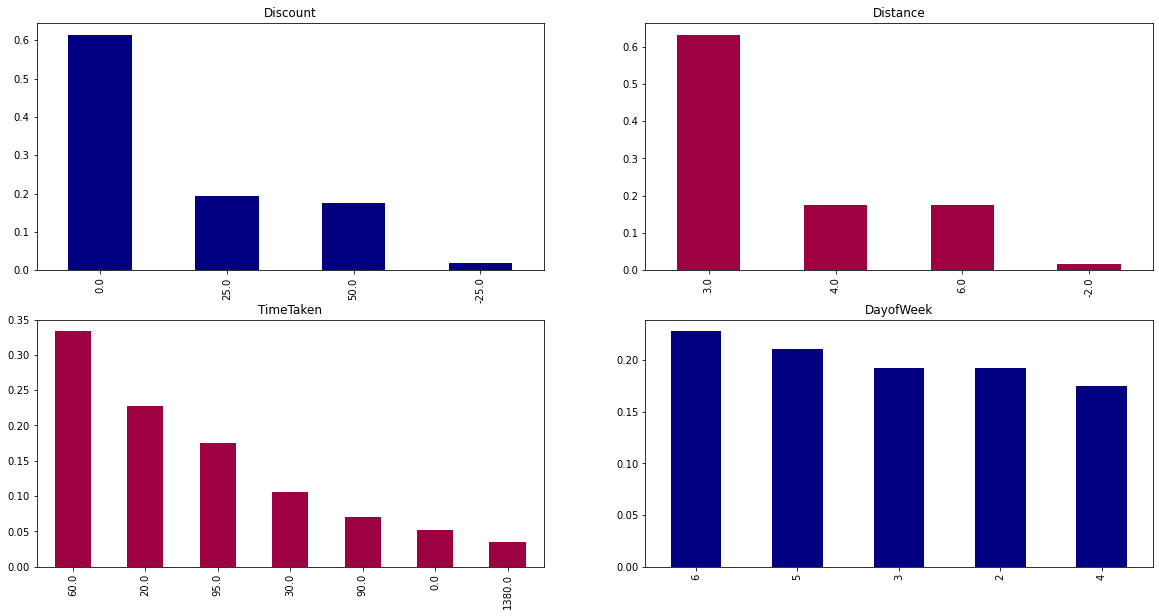

In [26]:
plt.figure(2)

plt.subplot(221) 
df['Discount'].value_counts(normalize=True).plot.bar(figsize=(20,10), cmap=cmap, title= 'Discount') 

plt.subplot(222) 
df['Distance'].value_counts(normalize=True).plot.bar(title= 'Distance', cmap=cmap1) 

plt.subplot(223) 
df['TimeTaken'].value_counts(normalize=True).plot.bar(title= 'TimeTaken', cmap=cmap1) 

plt.subplot(224) 
df['DayofWeek'].value_counts(normalize=True).plot.bar(title= 'DayofWeek', cmap=cmap)

In [27]:
df['Distance'].replace(-2, 2, inplace= True)
df['Discount'].replace(-25, 25, inplace= True)

### Checking distribution & Skewness - Histogram
<span style='background : yellow' > **Observation:**   </span> 
It is observed that there are outliers in Distance and Time Taken columns. Because of this, these fields seem to be right and left skewed respectively. Other columns seem to follow Normal distribution and we will also consider scaling in modeling

[Text(0.5, 1.0, 'histogram of Delivered')]

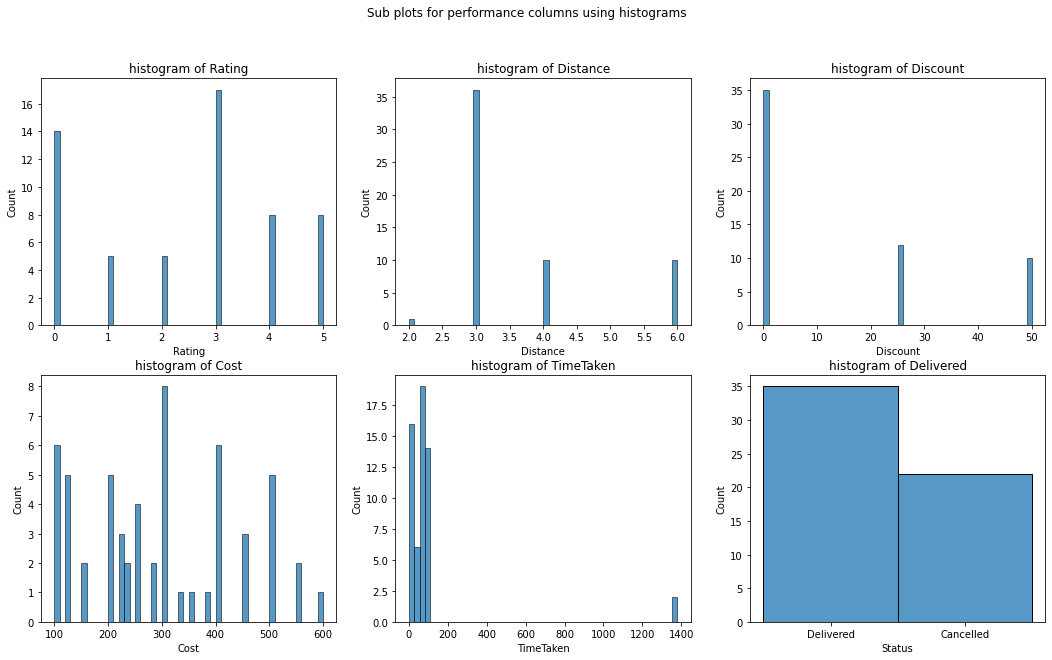

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Sub plots for performance columns using histograms')
sns.histplot(ax=axes[0, 0],data=df,x='Rating',bins=50).set(title="histogram of Rating")
sns.histplot(ax=axes[0, 1],data=df,x='Distance',bins=50).set(title="histogram of Distance")
sns.histplot(ax=axes[0, 2],data=df,x='Discount',bins=50).set(title="histogram of Discount")
sns.histplot(ax=axes[1, 0],data=df,x='Cost',bins=50).set(title="histogram of Cost")
sns.histplot(ax=axes[1, 1],data=df,x='TimeTaken',bins=50).set(title="histogram of TimeTaken")
sns.histplot(ax=axes[1, 2],data=df,x='Status',bins=50).set(title="histogram of Delivered")

### Discretization - Using equal Width Binning
DISCRETIZE PAID AMOUNT FIELD for analysis. It is observed that there are more orders with low paid amount compared to medium and high values. 

In [29]:
group_PaidAmt = ['Low Amt','Medium Amt','High Amt']
df['PaidAmt_Disc'] = pd.cut(df['Paid amount'],3,labels=group_PaidAmt)
df.head(3)

,Distance,Status,Cost,PromoCode,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating,OrderTIME,DeliveryTIME,TimeTaken,DayofWeek,PaidAmt_Disc
0,3.0,Delivered,300.0,PRO,50.0,293.0,COD,20.0,0.0,10.0,5.0,0.0,PANEER;ROTI,BING,VEG,2,2020-07-01 20:38:00,2020-07-01 21:38:00,60.0,2,Medium Amt
1,3.0,Delivered,100.0,BF,0.0,140.5,WALLET,20.0,0.0,10.0,5.0,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4,2020-07-01 08:38:00,2020-07-01 08:58:00,20.0,2,Low Amt
2,6.0,Cancelled,250.0,PRO,25.0,0.0,CARD,25.0,10.0,10.0,5.0,5.0,MIXVEG;RICE,BING,VEG,0,2020-07-01 21:00:00,2020-07-01 21:30:00,30.0,2,Low Amt


<AxesSubplot:title={'center':'PaidAmt_Disc'}>

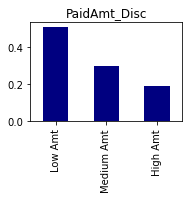

In [30]:
plt.subplot(224) 
df['PaidAmt_Disc'].value_counts(normalize=True).plot.bar(title= 'PaidAmt_Disc', cmap=cmap)

In [31]:
# We created the PaidAmt_Disc column for analysis purpose and since we need numerical values only for modelling, dropping this categorical field

df = df.drop(['PaidAmt_Disc'], axis=1)

### Outlier Detection (Using Boxplot) 
<span style='background : yellow' > **Observation:**   </span> 
* Handling the outliers in TimeTaken column using IQR method
* Ignoring the outlier in Distance column since the outlier in Distance is very close to upper limit and also the value seem be appropriate 

[Text(0.5, 1.0, 'boxplot of DayofWeek')]

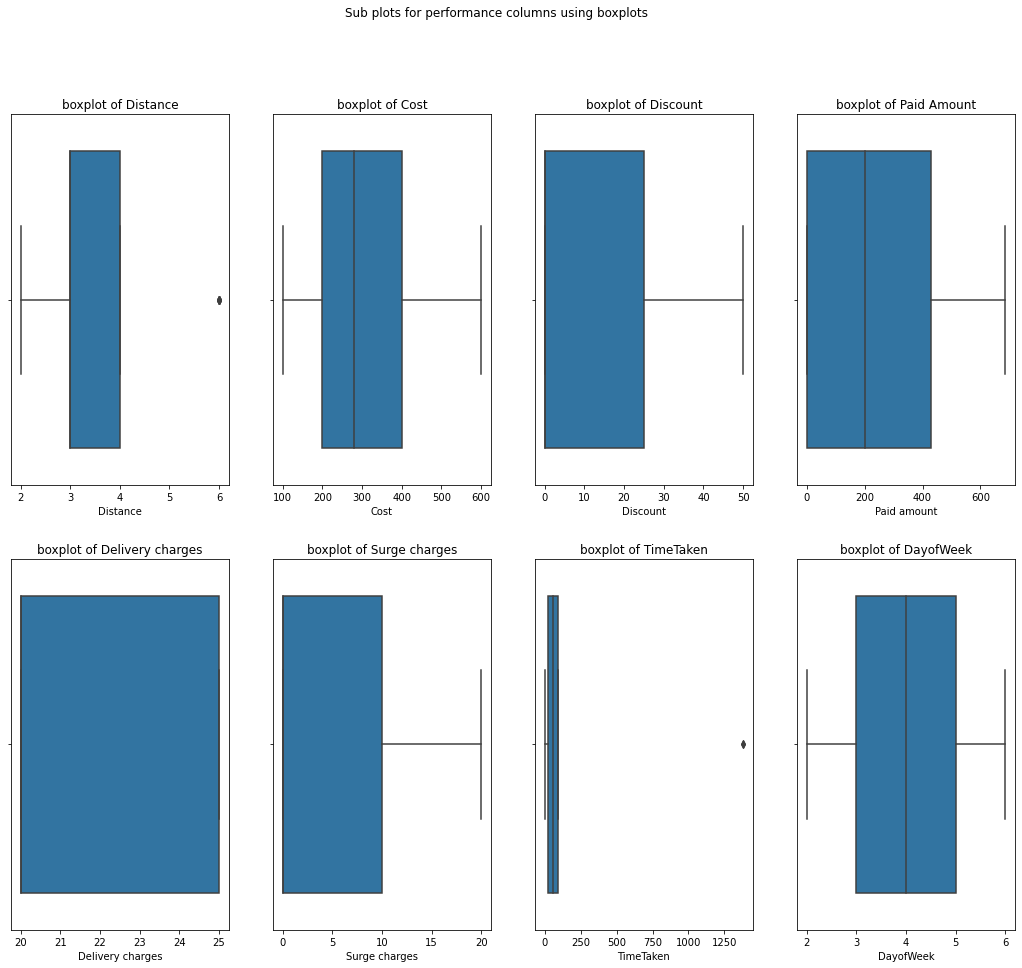

In [32]:
fig, axes = plt.subplots(2,4, figsize=(18, 15))
fig.suptitle('Sub plots for performance columns using boxplots')
sns.boxplot(ax=axes[0,0],data=df,x='Distance').set(title="boxplot of Distance")
sns.boxplot(ax=axes[0,1],data=df,x='Cost').set(title="boxplot of Cost")
sns.boxplot(ax=axes[0,2],data=df,x='Discount').set(title="boxplot of Discount")
sns.boxplot(ax=axes[0,3],data=df,x='Paid amount').set(title="boxplot of Paid Amount")
sns.boxplot(ax=axes[1,0],data=df,x='Delivery charges').set(title="boxplot of Delivery charges")
sns.boxplot(ax=axes[1,1],data=df,x='Surge charges').set(title="boxplot of Surge charges")
sns.boxplot(ax=axes[1,2],data=df,x='TimeTaken').set(title="boxplot of TimeTaken")
sns.boxplot(ax=axes[1,3],data=df,x='DayofWeek').set(title="boxplot of DayofWeek")

### <span style='color: Purple'> HANDLING THE OUTLIERS - USING IQR METHOD </span>
Replacing the outlier and zero values in TimeTaken with median value

In [33]:
#Finding IQR in 'TimeTaken' to identify Outliers
Q1 = np.percentile(df.TimeTaken, 35, interpolation = 'midpoint') 
Q3 = np.percentile(df.TimeTaken, 65, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

#Finding Outliers of TimeTaken variable
outlier =[]
for x in df['TimeTaken']:
    if ((x > up_lim) or (x < low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

#Calculating mean & median to check if the outliers can be replaced by one of them
median = float(df['TimeTaken'].median())
mean = float(df['TimeTaken'].mean())

print('median,mean',median,mean)

#Instead of dropping the outliers, I am replacing with the median value
df['TimeTaken'] = np.where(df['TimeTaken'] >up_lim, median, df['TimeTaken'])
df['TimeTaken'] = np.where(df['TimeTaken'] <low_lim, median, df['TimeTaken'])
df['TimeTaken'] = np.where(df['TimeTaken'] == 0, median, df['TimeTaken'])

Q1 25 percentile of the given data is,  30.0
Q1 75 percentile of the given data is,  60.0
Interquartile range is 30.0
low_limit is -15.0
up_limit is 105.0
 outlier in the dataset is [1380.0, 1380.0]
median,mean 60.0 99.12280701754386


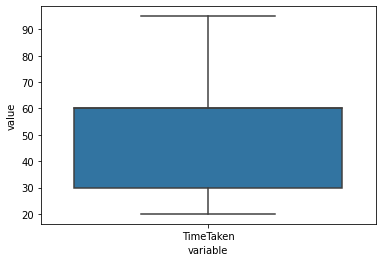

In [34]:
# Now, let's take a look at the boxplot once again to make sure there are no outliers in TimeTaken
Bag_boxplot = pd.DataFrame(data = df, columns = ["TimeTaken"])
sns.boxplot(x = "variable", y = "value", data = pd.melt(Bag_boxplot))
plt.show()

### <span style='color: Purple'> BINARIZE THE CATEGORICAL FIELDS USING DUMMIES CONCEPT </span>

In [35]:
df_data = df.copy()
print(df['Status'].unique())
print(df['Payment mode'].unique())
print(df['Type'].unique())
print(df['Membership'].unique())
print(df['PromoCode'].unique())
print(df['Tip'].unique())
print(df['Items'].unique())

['Delivered' 'Cancelled']
['COD' 'WALLET' 'CARD']
['VEG' 'MIX']
['BING' 'BONG' 'NO']
['PRO' 'BF' 'NONE']
[0. 5.]
['PANEER;ROTI' 'DAL;CHICKEN;ROTI' 'MIXVEG;RICE' 'CHICKEN;BIRYANI'
 'DAL;ROTI']


In [36]:
df = pd.get_dummies(df, columns = ['Status'])

df = pd.get_dummies(df, columns = ['Payment mode'])

df = pd.get_dummies(df, columns = ['Membership'])
df.drop("Membership_NO", axis = 1, inplace=True)

df = pd.get_dummies(df, columns = ['PromoCode'])
df.drop("PromoCode_NONE", axis = 1, inplace=True)

df = pd.get_dummies(df, columns = ['Items'])
                    
dummy_variable_Tip = pd.get_dummies(df['Tip'])
dummy_variable_Tip.columns = ['Tip_NO','Tip_YES']
# merge data frame "df" and "dummy_variable_Tip" 
df = pd.concat([df, dummy_variable_Tip], axis=1)
# drop original column "Tip" from "df"
df.drop("Tip", axis = 1, inplace=True)

df.head(2)

,Distance,Cost,Discount,Paid amount,Delivery charges,Surge charges,Packaging charges,ST,Type,Rating,OrderTIME,DeliveryTIME,TimeTaken,DayofWeek,Status_Cancelled,Status_Delivered,Payment mode_CARD,Payment mode_COD,Payment mode_WALLET,Membership_BING,Membership_BONG,PromoCode_BF,PromoCode_PRO,Items_CHICKEN;BIRYANI,Items_DAL;CHICKEN;ROTI,Items_DAL;ROTI,Items_MIXVEG;RICE,Items_PANEER;ROTI,Tip_NO,Tip_YES
0,3.0,300.0,50.0,293.0,20.0,0.0,10.0,5.0,VEG,2,2020-07-01 20:38:00,2020-07-01 21:38:00,60.0,2,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0
1,3.0,100.0,0.0,140.5,20.0,0.0,10.0,5.0,MIX,4,2020-07-01 08:38:00,2020-07-01 08:58:00,20.0,2,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1


## <center><span style='color: Brown'>Task (B): Descriptive Analytics on Data </span>

### <span style='color: Purple'> BIVARIATE ANALYSIS </span>
<span style='background : yellow' > **Observation:**   </span> 

Feature Vs Rating
* Distance - Distance of 6kms results in 0 rating
* Status - Cancelled orders are more likely to give 0 rating
* PromoCode - if 'BF' code is used then it mostly results in medium to high rating(3-5)
* Delivery Charges - More delivery charge ends up in lesser rating
* Tip - If Tip is given then it is more likely to result in medium to high rating(3-5)
* Items - if it is MixVeg:Rice then the rating is always 0
* Membership - 'BONG' membership, more likely to result in medium to high rating(3-5)
* Payment Mode - if opted for COD, it always ends up being low to medium rating(0-3)

Combinations
* Payment Mode, Status & Rating - if opted for Card payment, it always ends up being cancelled order and further results in 0 rating
* Discount & Tip - More the discount it is more likely to results into Tip.
* Membership, Promocode & Rating - 'BONG' membership & 'BF' promocode combo results into medium to high rating(3-5)
* Distance, Delivery charge & Rating - More Distance have more delivery charges applied and ends up in lesser rating

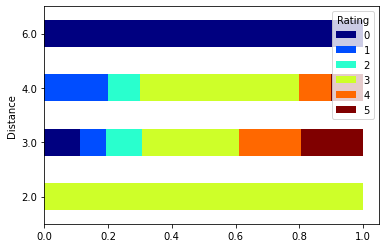

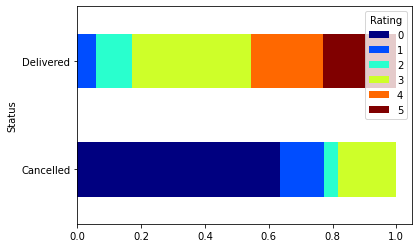

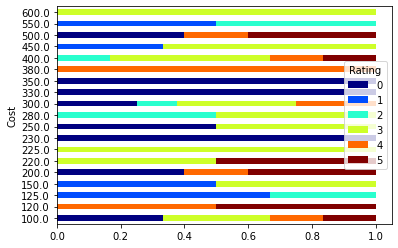

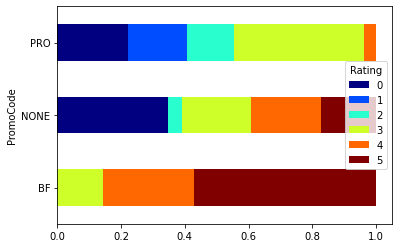

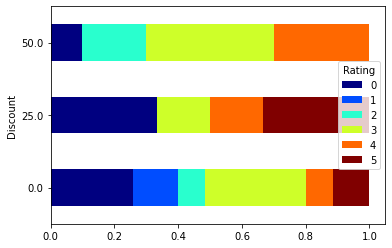

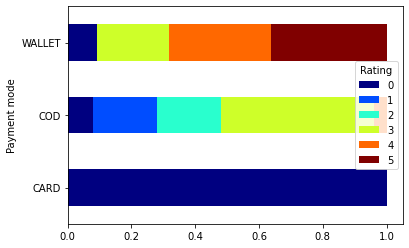

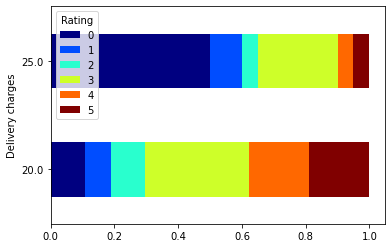

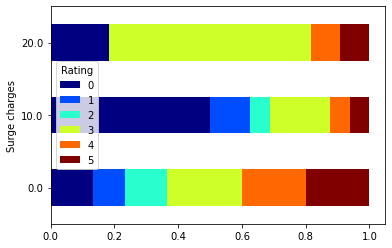

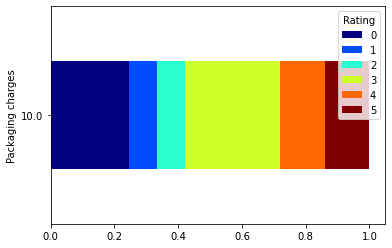

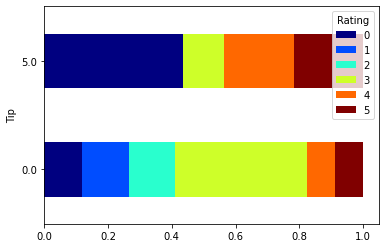

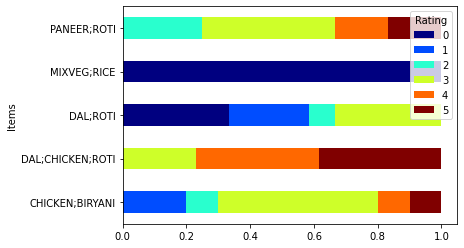

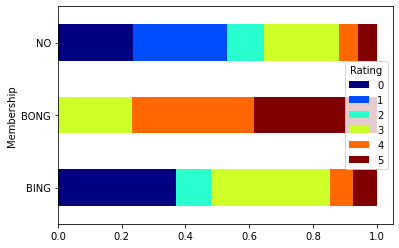

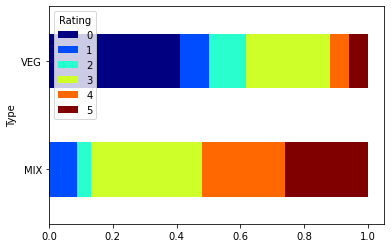

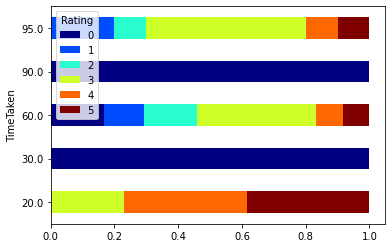

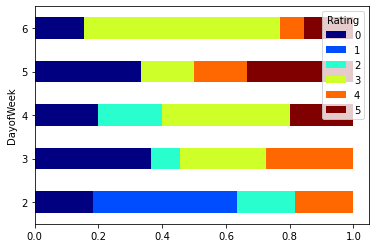

In [37]:
df_data = df_data.drop(['Paid amount','ST','OrderTIME','DeliveryTIME'], axis = 1)

for (columnName, columnData) in df_data.iteritems():
    if columnName != 'Rating':
        Bivariate_Plot = pd.crosstab(df_data[columnName],df_data['Rating'])
        Bivariate_Plot.div(Bivariate_Plot.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
        plt.show()

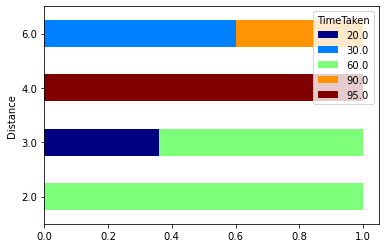

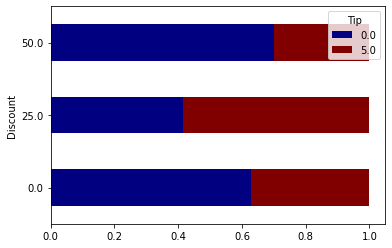

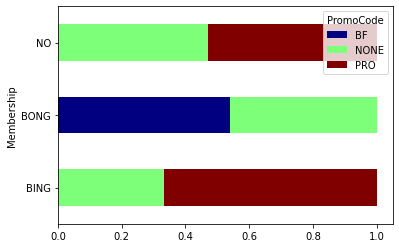

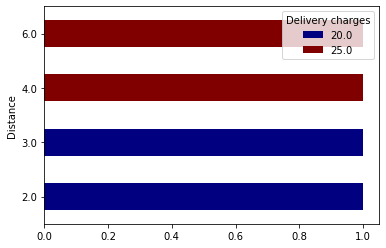

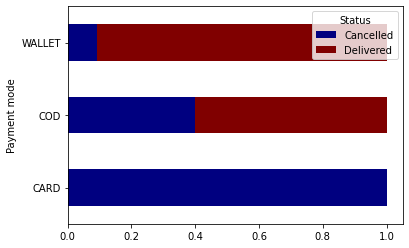

In [38]:
day=pd.crosstab(df_data['Distance'],df_data['TimeTaken']) 
day.div(day.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

Surge=pd.crosstab(df_data['Discount'],df_data['Tip']) 
Surge.div(Surge.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

Time=pd.crosstab(df_data['Membership'],df_data['PromoCode']) 
Time.div(Time.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

status=pd.crosstab(df_data['Distance'],df_data['Delivery charges']) 
status.div(status.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

day=pd.crosstab(df_data['Payment mode'],df_data['Status']) 
day.div(day.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

### <span style='color: Purple'> CORRELATION - HEATMAP</span>
<span style='background : yellow' > **Observation:**   </span> From the bivariate analysis, we have considered only few columns which seem to have good relation with Rating for heatmap

From the heatmap, it is observed that Cost, Payment mode_COD & Membership_BING have very less correlation to Rating hence they are not considered. Also, Tip_NO & Status_Cancelled have inverse correlation with Tip_YES & Status_Cancelled, hence considering only 1 of these.

In [39]:
df1 = df[['Rating','Distance','Cost',
          'Paid amount','Discount','Delivery charges',
          'Tip_YES','Tip_NO','PromoCode_PRO','PromoCode_BF',
          'Membership_BING','Membership_BONG','Status_Delivered',
          'Payment mode_CARD','Payment mode_COD','Payment mode_WALLET',
          'Status_Cancelled','DayofWeek','TimeTaken']]

<AxesSubplot:>

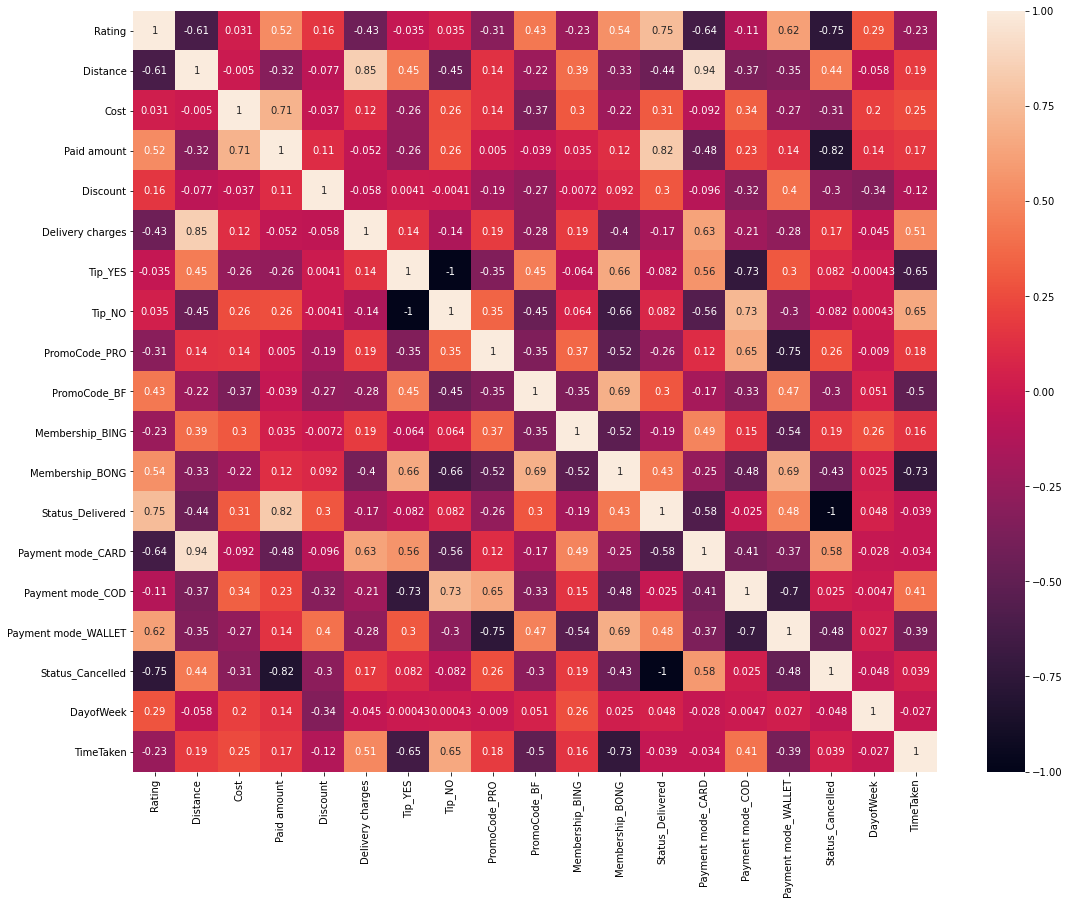

In [40]:
plt.figure(figsize=(18, 14))
correlation = df1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

In [41]:
df1 = df[['Rating','Distance','Paid amount',
          'Discount','Delivery charges','Tip_YES',
          'PromoCode_PRO','PromoCode_BF','Membership_BONG',
          'Payment mode_CARD','Payment mode_WALLET',
          'Status_Delivered','DayofWeek','TimeTaken']]

## <center><span style='color: Brown'>Task (C): FEATURE ENGINEERING </span>
### Feature Subset Selection - Filter Method
<span style='background : yellow' > **Observation:**   </span> **We have used 3 types of filter methods and concluded 9 features(out of 13) that have significant impact on the rating**

In [42]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [43]:
def show_top_univariate_filters(data, score_func, top_k):
    X = data.iloc[:,1:13]  #independent columns
    y = data.iloc[:,0]    #target column i.e Rating 
          
    if score_func == "chi2":
        func = chi2
    elif score_func == "f_regression":
        func = f_regression
    elif score_func == "mutual_info_regression":
        func = mutual_info_regression
    
    #apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=func, k=top_k)
    fit = bestfeatures.fit(X,y)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    #concatenate two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(top_k,'Score'))  #print top best features  

In [44]:
show_top_univariate_filters(df1, 'chi2', 7)

                  Specs        Score
1           Paid amount  4311.773149
2              Discount   164.269958
8     Payment mode_CARD    30.714286
9   Payment mode_WALLET    19.147011
7       Membership_BONG    16.725113
6          PromoCode_BF    13.836134
10     Status_Delivered    13.761345


In [45]:
show_top_univariate_filters(df1, 'f_regression', 7)

                  Specs      Score
10     Status_Delivered  71.818147
8     Payment mode_CARD  38.783853
9   Payment mode_WALLET  33.826089
0              Distance  33.319111
7       Membership_BONG  22.922312
1           Paid amount  20.568944
6          PromoCode_BF  12.658488


In [46]:
show_top_univariate_filters(df1, 'mutual_info_regression', 7)

                  Specs     Score
1           Paid amount  0.426581
9   Payment mode_WALLET  0.356970
10     Status_Delivered  0.351191
0              Distance  0.338808
8     Payment mode_CARD  0.274740
11            DayofWeek  0.190573
5         PromoCode_PRO  0.177546


In [47]:
df1_Filter = df1[['Rating','Paid amount','Distance','Payment mode_CARD','Payment mode_WALLET',       
                  'PromoCode_PRO','PromoCode_BF','Membership_BONG','Status_Delivered','DayofWeek']]

## <center><span style='color: Brown'>Task (D): MODEL BUILDING & DIAGNOSTICS </span>
    
Approach: 
    
* Model Building (SGD) using the dataframe that we concluded after checking correlation using Heat Map
* Building another model (OLS) considering the significant features from Filter Methods
* Principal Component Analysis - Concluded 6 Principal components
* Model Building with Principal Components

### SPLITTING DATA AND SCALING DATA FOR NORMALIZATION

#### <span style='color:Black'> Now lets start to prepare our data for Modeling. For this we are going to split the data into 60:40 for traindata:testdata (tried with 70:30 & 80:20 but 60:40 lead to better results with my data)
    
#### Before splitting we are going to scale the data using StandardScaler. StandardScaler follows Standard Normal Distribution. Therefore, it makes mean = 0 and scales the data to unit variance.
</span>


In [48]:
scaler = StandardScaler()
df1  = pd.DataFrame(scaler.fit_transform(df1),columns = df1.columns)
X = df1.drop('Rating', axis=1)
y = df1[["Rating"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=30) 


### STOCHASTIC GRADIENT DESCENT METHOD

In [49]:
sgd_reg = SGDRegressor(max_iter=1000,tol=0.00001,eta0=0.001)
sgd_reg.fit(X_train,y_train['Rating'])

print("Coefficients are:", sgd_reg.coef_)
print("Intercept is:", sgd_reg.intercept_)

sgd_rmse2 = math.sqrt(mean_squared_error(sgd_reg.predict(X_train),y_train))
y_pred = sgd_reg.predict(X_train)
sgd_rse2 = (sgd_rmse2**2)*X_train.shape[0]
sgd_rse2/= X_train.shape[0]-2
sgd_rse2 = math.sqrt(sgd_rse2)
sgd_mse2 = sgd_rmse2**2
print("rmse: ",sgd_rmse2)
print("mse: ",sgd_mse2)
print("rse: ",sgd_rse2)
print("r2 score:" , sgd_reg.score(X_train,y_train))

Coefficients are: [-1.29198704e-01  1.35009295e-01  9.27580953e-02 -2.12388828e-02
  6.07747482e-03  1.00417590e-01  1.89025525e-01  1.19408508e-01
 -1.23890593e-01  1.51992380e-01  2.67519037e-01  1.55982969e-01
  2.14938828e-06]
Intercept is: [-0.0745745]
rmse:  0.43953998252028326
mse:  0.19319539623393092
rse:  0.453067443653317
r2 score: 0.7979275917343476


In [50]:
sgd_rmse2 = math.sqrt(mean_squared_error(sgd_reg.predict(X_test),y_test))
y_pred = sgd_reg.predict(X_test)
sgd_rse2 = (sgd_rmse2**2)*X_test.shape[0]
sgd_rse2/= X_test.shape[0]-2
sgd_rse2 = math.sqrt(sgd_rse2)
sgd_mse2 = sgd_rmse2**2
print("rmse: ",sgd_rmse2)
print("mse: ",sgd_mse2)
print("rse: ",sgd_rse2)
print("r2 score:" , sgd_reg.score(X_test,y_test))

rmse:  0.5573467245262513
mse:  0.3106353713401411
rse:  0.5832835437590833
r2 score: 0.7078079104385744


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y')

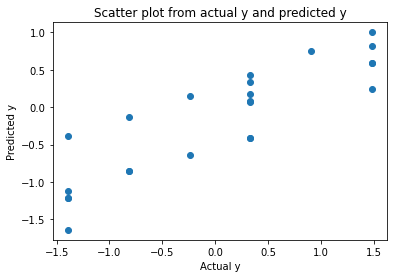

In [51]:
# Predict
y_pred_sgd = sgd_reg.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')

#### We are going to consider significant features from the Filter methods that we used before this section and going to try a different model (OLS approach)

In [52]:
scaler = StandardScaler()
df1_Filter  = pd.DataFrame(scaler.fit_transform(df1_Filter),columns = df1_Filter.columns)
X = df1_Filter.drop('Rating', axis=1)
y = df1_Filter[["Rating"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=30, stratify=y)

### OLS METHOD

In [53]:
import statsmodels.api as sm 
model= sm.OLS(y_train,sm.add_constant(X_train)).fit()          #fitting the model
print("model summary:",model.summary())

model summary:                             OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     11.19
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.22e-06
Time:                        22:21:28   Log-Likelihood:                -20.221
No. Observations:                  34   AIC:                             60.44
Df Residuals:                      24   BIC:                             75.71
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

In [54]:
model_predict = model.predict(sm.add_constant(X_train))

model_rmse = (np.sqrt(mean_squared_error(y_train, model_predict)))
print("rmse on training dataset using statsmodel: ",model_rmse)

model_mse = mean_squared_error(y_train, model_predict)
print("mse on training dataset using statsmodel: ",model_mse)

model_r2_score = r2_score(y_train, model_predict)
print("r2 score on training data set using statsmodel: ",model_r2_score)

rmse on training dataset using statsmodel:  0.438581495964446
mse on training dataset using statsmodel:  0.19235372860241137
r2 score on training data set using statsmodel:  0.8075277954666552


In [55]:
model_predict = model.predict(sm.add_constant(X_test))

model_rmse = (np.sqrt(mean_squared_error(y_test, model_predict)))
print("rmse on test dataset using statsmodel: ",model_rmse)

model_mse = mean_squared_error(y_test, model_predict)
print("mse on test dataset using statsmodel: ",model_mse)

model_r2_score = r2_score(y_test, model_predict)
print("r2 score on test data set using statsmodel: ",model_r2_score)

rmse on test dataset using statsmodel:  0.48432323692323487
mse on test dataset using statsmodel:  0.23456899782379992
r2 score on test data set using statsmodel:  0.7649442146639542


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y')

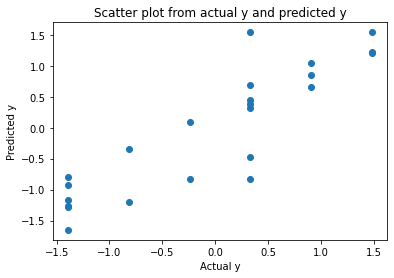

In [56]:
# Predict
y_pred_sgd = model.predict(sm.add_constant(X_test))

plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')

### PRINCIPAL COMPONENT ANALYSIS

In [57]:
scaler = StandardScaler()
df1_pca  = pd.DataFrame(scaler.fit_transform(df1),columns = df1.columns)
X = df1_pca.drop('Rating', axis=1)
y = df1_pca[["Rating"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

Text(0, 0.5, 'Cumulative explained variance')

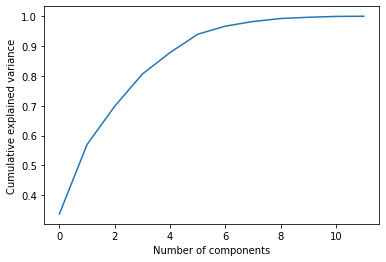

In [58]:
from sklearn import datasets
from sklearn.decomposition import PCA
pca = PCA(12)
pca_full = pca.fit(X)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [59]:
pca = PCA(n_components=5)
# pca.fit(X)

principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,
             columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [60]:
#Checking explained variance
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[4.46490453 3.0801347  1.69908006 1.4257911  0.95401563]
[0.33742868 0.23277671 0.12840551 0.10775209 0.07209835]
[0.33742868 0.57020539 0.6986109  0.806363   0.87846135]


So 87.8% of variance is retained after reducing dimensions from 12 to 5 using PCA with respective variance of each component shown above in second list

In [61]:
finalDf = pd.concat([principalDf, df1[['Rating']]], axis = 1)
X = finalDf.drop(['Rating'], axis=1)
y = finalDf[["Rating"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=30)

### OLS METHOD for Principal Components

In [62]:
import statsmodels.api as sm 
model= sm.OLS(y_train,sm.add_constant(X_train)).fit()          #fitting the model
print("model summary:",model.summary())

model summary:                             OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     17.10
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           9.35e-08
Time:                        22:21:32   Log-Likelihood:                -23.686
No. Observations:                  34   AIC:                             59.37
Df Residuals:                      28   BIC:                             68.53
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1078      0.093     

In [63]:
model_predict = model.predict(sm.add_constant(X_train))

model_rmse = (np.sqrt(mean_squared_error(y_train, model_predict)))
print("rmse on training dataset using statsmodel: ",model_rmse)

model_mse = mean_squared_error(y_train, model_predict)
print("mse on training dataset using statsmodel: ",model_mse)

model_r2_score = r2_score(y_train, model_predict)
print("r2 score on training data set using statsmodel: ",model_r2_score)

rmse on training dataset using statsmodel:  0.48563654669958545
mse on training dataset using statsmodel:  0.23584285549029863
r2 score on training data set using statsmodel:  0.7533205515753236


In [64]:
model_predict = model.predict(sm.add_constant(X_test))

model_rmse = (np.sqrt(mean_squared_error(y_test, model_predict)))
print("rmse on test dataset using statsmodel: ",model_rmse)

model_mse = mean_squared_error(y_test, model_predict)
print("mse on test dataset using statsmodel: ",model_mse)

model_r2_score = r2_score(y_test, model_predict)
print("r2 score on test data set using statsmodel: ",model_r2_score)

rmse on test dataset using statsmodel:  0.6195208228105842
mse on test dataset using statsmodel:  0.3838060498959032
r2 score on test data set using statsmodel:  0.6389815775918076


## <center><span style='color:Purple'> Observation / Conclusion </span>
### Overall Model Parameters
#### OLS Method: 

**On Training Data:**<br>
rmse    :  0.43954571774672<br>
mse     :  0.19235372860241148<br>
r2 score:  0.8075277954666551<br>

**On Test Data:**<br>
rmse    :  0.8075277954666551<br>
mse     :  0.23456899782379964<br>
r2 score:  0.7649442146639545<br>

#### STOCHASTIC GRADIENT DESCENT METHOD:
    
**On Training Data:**<br>
rmse:  0.43954571774672<br>
mse:  0.19320043798947925<br>
rse:  0.4530733553894134<br>
r2 score: 0.7979223183183894<br>

**On Test Data:**<br>
rmse:  0.5573119194639266<br>
mse:  0.31059657557656617<br>
rse:  0.5832471190001314<br>
r2 score: 0.7078444027902864<br>

#### OLS METHOD WITH PRINCIPAL COMPONENTS:

**On Training Data:**<br>
rmse    :  0.4856365466995855<br>
mse     :  0.23584285549029868<br>
r2 score:  0.7533205515753236<br>

**On Test Data:**<br>
rmse    :  0.6195208228105845<br>
mse     :  0.3838060498959037<br>
r2 score:  0.6389815775918073<br>

### CONCLUSION:

    From the scores of STOCHASTIC GRADIENT DESCENT METHOD AND OLS METHOD, we can conclude that OLS as a better approach.
    
    Model scores for Principal Components dont seem to be better for our data & scenario. Hence, it is not recommended. 

### Recommendation: 

    Model recommended to Swiggyto: OLS Approach for Rating Prediction

    Important features to be considered by Swiggyto for better customer rating:
        
    Paid amount,Distance,Payment mode_CARD,Payment mode_WALLET,PromoCode_PRO,PromoCode_BF,Membership_BONG,Status_Delivered,DayofWeek